In [1]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Import the tpot regressor
from tpot import TPOTRegressor

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


### SAMPLE Dataset

In [94]:
# Read in features from GitHub
train_features = pd.read_csv('https://raw.githubusercontent.com/WillKoehrsen/machine-learning-project-walkthrough/master/data/X_train.csv')
test_features = pd.read_csv('https://raw.githubusercontent.com/WillKoehrsen/machine-learning-project-walkthrough/master/data/X_test.csv')

# Read in labels from GitHub
train_labels = pd.read_csv('https://raw.githubusercontent.com/WillKoehrsen/machine-learning-project-walkthrough/master/data/Y_train.csv')
test_labels = pd.read_csv('https://raw.githubusercontent.com/WillKoehrsen/machine-learning-project-walkthrough/master/data/Y_test.csv')

print('Training features shape: ', train_features.shape)
print('Testing features shape:  ', test_features.shape)

Training features shape:  (6622, 82)
Testing features shape:   (2839, 82)


In [95]:
train_features

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),...,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility
0,13276,5849784,90300.0,77300.0,1950,1,100,126.0,136.8,5.2,...,0,0,0,0,0,0,0,0,0,0
1,7377,4398442,52000.0,52000.0,1926,1,100,95.4,102.0,4.7,...,0,0,0,0,0,0,0,0,0,0
2,9479,4665374,104700.0,105000.0,1954,1,100,40.4,40.0,3.8,...,0,0,0,0,0,0,0,0,0,0
3,14774,3393340,129333.0,129333.0,1992,1,100,157.1,163.1,16.9,...,0,0,0,1,0,0,0,0,0,0
4,3286,2704325,109896.0,116041.0,1927,1,100,62.3,68.2,3.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6617,8818,4044737,55400.0,62000.0,1958,1,90,72.3,NaN,2.9,...,0,0,0,0,0,0,0,0,0,0
6618,8027,2609697,106500.0,106500.0,1928,1,100,73.7,80.4,3.7,...,0,0,0,0,0,0,0,0,0,0
6619,8343,3119428,112339.0,123573.0,1962,1,100,88.0,91.8,5.6,...,0,0,0,0,0,0,0,0,0,0
6620,1574,5039588,100244.0,109885.0,1927,1,50,26.6,26.6,7.8,...,0,0,0,0,0,0,0,0,0,0


In [96]:
train_labels

,score
0,16.0
1,53.0
2,99.0
3,35.0
4,91.0
...,...
6617,82.0
6618,88.0
6619,41.0
6620,97.0


In [97]:
# Convert to numpy arrays
training_features = np.array(train_features)
testing_features = np.array(test_features)
training_features

array([[1.327600e+04, 5.849784e+06, 9.030000e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [7.377000e+03, 4.398442e+06, 5.200000e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [9.479000e+03, 4.665374e+06, 1.047000e+05, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [8.343000e+03, 3.119428e+06, 1.123390e+05, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.574000e+03, 5.039588e+06, 1.002440e+05, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.139800e+04, 4.406995e+06, 5.270000e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [98]:
# Sklearn wants the labels as one-dimensional vectors
training_targets = np.array(train_labels).reshape((-1,))
testing_targets = np.array(test_labels).reshape((-1,))
training_targets

array([16., 53., 99., ..., 41., 97., 67.])

In [7]:
# Create a tpot object with a few parameters
tpot = TPOTRegressor(scoring = 'neg_mean_absolute_error', 
                    max_time_mins = 480, 
                    n_jobs = -1,
                    verbosity = 2,
                    cv = 5)

In [8]:
# Fit the tpot model on the training data
tpot.fit(training_features, training_targets)

Imputing missing values in feature set


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -8.73740849986034

Generation 2 - Current best internal CV score: -8.716362231502213

Generation 3 - Current best internal CV score: -8.712769258818426

Generation 4 - Current best internal CV score: -8.68206871672659

Generation 5 - Current best internal CV score: -8.68206871672659

Generation 6 - Current best internal CV score: -8.661899198288152

Generation 7 - Current best internal CV score: -8.570170336711106

Generation 8 - Current best internal CV score: -8.511745611530241

Generation 9 - Current best internal CV score: -8.506541523567538

Generation 10 - Current best internal CV score: -8.506541523567538

Generation 11 - Current best internal CV score: -8.506541523567538

Generation 12 - Current best internal CV score: -8.488490709562402

Generation 13 - Current best internal CV score: -8.4860772465687

Generation 14 - Current best internal CV score: -8.4860772465687

Generation 15 - Current best internal CV score: -8.472944660189

TPOTRegressor(max_time_mins=480, n_jobs=-1, scoring='neg_mean_absolute_error',
              verbosity=2)

In [9]:
# Show the final model
print(tpot.fitted_pipeline_)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('stackingestimator-1',
                 StackingEstimator(estimator=ElasticNetCV(l1_ratio=0.75,
                                                          tol=1e-05))),
                ('stackingestimator-2',
                 StackingEstimator(estimator=ExtraTreesRegressor(max_features=0.25,
                                                                 min_samples_leaf=20,
                                                                 min_samples_split=14))),
                ('stackingestimator-3',
                 StackingEstimator(estimator=LassoLarsCV(normalize=True)...
                 StackingEstimator(estimator=LassoLarsCV(normalize=True))),
                ('selectpercentile',
                 SelectPercentile(percentile=70,
                                  score_func=<function f_regression at 0x000001693C5B6CA0>)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alph

In [14]:
print(tpot.score(test_features, test_labels))

Imputing missing values in feature set
-8.489437339427395


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


In [10]:
# Export the pipeline as a python script file
tpot.export('C:/Users/USER/Desktop/Side/AutoML/tpot_exported_pipeline.py')

#model training & exporting

In [9]:
# Read in features from GitHub
train_features = pd.read_csv('https://raw.githubusercontent.com/WillKoehrsen/machine-learning-project-walkthrough/master/data/X_train.csv')
test_features = pd.read_csv('https://raw.githubusercontent.com/WillKoehrsen/machine-learning-project-walkthrough/master/data/X_test.csv')

# Read in labels from GitHub
train_labels = pd.read_csv('https://raw.githubusercontent.com/WillKoehrsen/machine-learning-project-walkthrough/master/data/Y_train.csv')
test_labels = pd.read_csv('https://raw.githubusercontent.com/WillKoehrsen/machine-learning-project-walkthrough/master/data/Y_test.csv')

print('Training features shape: ', train_features.shape)
print('Testing features shape:  ', test_features.shape)

Training features shape:  (6622, 82)
Testing features shape:   (2839, 82)


In [28]:
tpot_data=pd.concat((train_features,train_labels),axis=1)
print(train_features.shape,train_labels.shape, tpot_data.shape)

(6622, 82) (6622, 1) (6622, 83)


In [29]:
# file_root=''
target_columns='score'

In [42]:
#model
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.linear_model import ElasticNetCV, LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import RobustScaler
from sklearn.svm import LinearSVR
from tpot.builtins import StackingEstimator
from sklearn.impute import SimpleImputer

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
# tpot_data = pd.read_csv(file_root, dtype=np.float64)
features = tpot_data.drop(target_columns, axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data[target_columns], random_state=None)

imputer = SimpleImputer(strategy="median")
imputer.fit(training_features)
training_features = imputer.transform(training_features)
testing_features = imputer.transform(testing_features)

# Average CV score on the training set was: -8.374024929929377
exported_pipeline = make_pipeline(
    RobustScaler(),
    StackingEstimator(estimator=ElasticNetCV(l1_ratio=0.75, tol=1e-05)),
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=False, max_features=0.25, min_samples_leaf=20, min_samples_split=14, n_estimators=100)),
    StackingEstimator(estimator=LassoLarsCV(normalize=True)),
    StackingEstimator(estimator=LinearSVR(C=5.0, dual=True, epsilon=1.0, loss="squared_epsilon_insensitive", tol=0.01)),
    StackingEstimator(estimator=LassoLarsCV(normalize=True)),
    SelectPercentile(score_func=f_regression, percentile=70),
    GradientBoostingRegressor(alpha=0.85, learning_rate=0.1, loss="huber", max_depth=5, max_features=0.9500000000000001, min_samples_leaf=13, min_samples_split=19, n_estimators=100, subsample=0.7500000000000001)
)

model=exported_pipeline.fit(training_features, training_target)
results = model.predict(testing_features)



c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105.39836232434027, tolerance: 34.26313698968036
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214.1978870544117, tolerance: 34.26313698968036
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [43]:
exported_pipeline

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('stackingestimator-1',
                 StackingEstimator(estimator=ElasticNetCV(l1_ratio=0.75,
                                                          tol=1e-05))),
                ('stackingestimator-2',
                 StackingEstimator(estimator=ExtraTreesRegressor(max_features=0.25,
                                                                 min_samples_leaf=20,
                                                                 min_samples_split=14))),
                ('stackingestimator-3',
                 StackingEstimator(estimator=LassoLarsCV(normalize=True)...
                 StackingEstimator(estimator=LassoLarsCV(normalize=True))),
                ('selectpercentile',
                 SelectPercentile(percentile=70,
                                  score_func=<function f_regression at 0x000001693C5B6CA0>)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.85, loss='huber',
                                           max_depth=5,
                                           max_features=0.9500000000000001,
                                           min_samples_leaf=13,
                                           min_samples_split=19,
                                           subsample=0.7500000000000001))])

In [44]:
print('Mean Absolute Error = %0.4f' % np.mean(abs(results - testing_target)))

Mean Absolute Error = 8.3648


In [48]:
# model save to disk
import pickle
filename = 'C:/Users/USER/Desktop/Side/AutoML/TPOT_regressor_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [51]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
results_f = loaded_model.predict(testing_features)
# result_f = loaded_model.score(testing_features, testing_target)
print('Mean Absolute Error = %0.4f' % np.mean(abs(results_f - testing_target)))

Mean Absolute Error = 8.3648


#plot (결과 시각화) , Test data

In [76]:
test_features = pd.read_csv('https://raw.githubusercontent.com/WillKoehrsen/machine-learning-project-walkthrough/master/data/X_test.csv')
test_labels = pd.read_csv('https://raw.githubusercontent.com/WillKoehrsen/machine-learning-project-walkthrough/master/data/Y_test.csv')

In [82]:
imputer = SimpleImputer(strategy="median")
imputer.fit(test_features)
testing_features2 = imputer.transform(test_features)


In [85]:
results_t = loaded_model.predict(testing_features2)


array([16.01790992, 48.72238202, 58.83958671, ..., 80.67036897,
       66.88308332, 96.00536315])

In [101]:
test_labels['predict']=pd.DataFrame(results_t)
dd=test_labels.iloc[2820:]

Text(0.5, 0, 'Date')

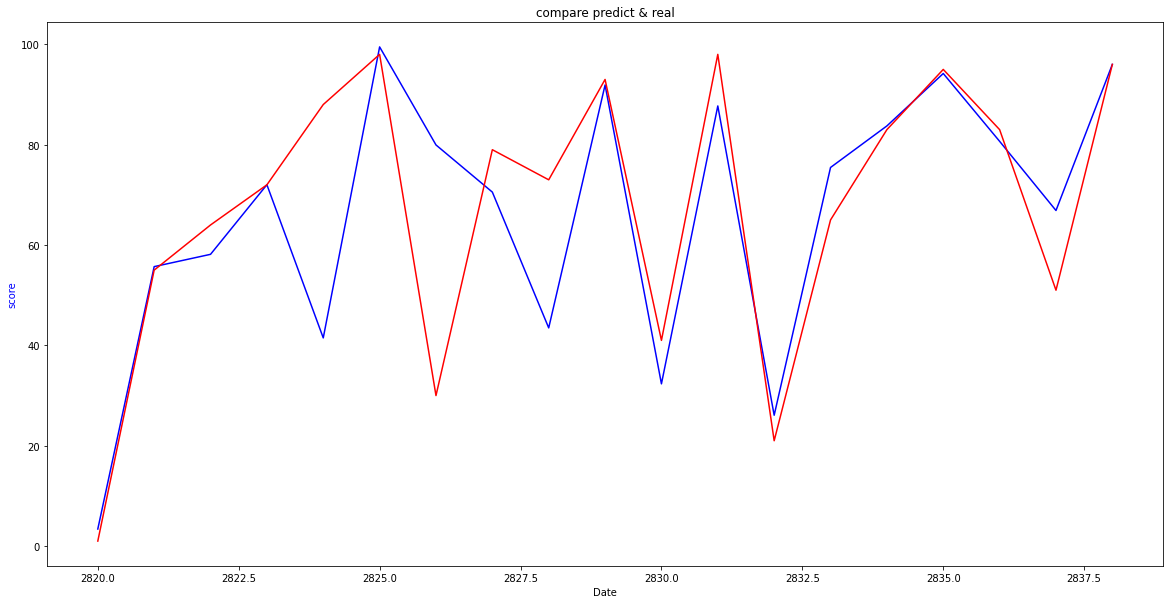

In [106]:
  import matplotlib.pyplot as plt
  plt.figure(figsize=(20,10))
  plt.plot(dd.index,dd['predict'], 'b')
  plt.plot(dd.index,dd['score'], 'r')
  plt.ylabel('score', color='blue')
  plt.title('compare predict & real')
  plt.xlabel('Date')

### 실제 데이터 활용(한솔 데이터 전력 사용량 데이터)

In [2]:
import pandas as pd
data=pd.read_csv('C:/Users/USER/Desktop/진행중/FEMS/datamart/HS_DataMart_v1.0.csv',encoding='cp949')

In [3]:
data=data.drop(['Unnamed: 0'], axis=1)
data['datetime']=pd.to_datetime(data['datetime'])

In [4]:
#train,test split

from math import floor
def train_test_split_df(df, test_size):
  # TODO: test_size(0 < test_size < 1) 비율에 따라 테스트/학습 데이터프레임으로 나누어 반환
  div = floor(df.shape[0] * (1 - test_size))
  return df.loc[:div], df.loc[div + 1:]

train_df, test_df = train_test_split_df(data, 0.01)
print('Train data :',train_df['datetime'].min(),' ~ ',train_df['datetime'].max(),'(',len(train_df),')')
print('Test data :',test_df['datetime'].min(),' ~ ',test_df['datetime'].max(),'(',len(test_df),')')


Train data : 2022-04-26 00:00:00  ~  2022-06-10 00:30:00 ( 4323 )
Test data : 2022-06-10 00:45:00  ~  2022-06-10 11:15:00 ( 43 )


#feature engineering
1. (비정상) column downtime 제거  (209개 제거됨)   
2. datetime을 feature(mon,day,hour,min,weekday)화    

 *  feature :    
    1. 'TURNING ROLL 보류율',    
    2. '사이로 백수 온도',
    3. 'TURNING ROLL_WIRE 진공도 토탈',     
    4. 'TURNING ROLL 속도',    
    5. 'CENTER NO2 ROLL 속도',     
    6. '1군 DRYER 속도',   
    7. 'NO8 DRYER 속도',    
    8. 'CALENDER BTM ROLL속도',    
    9. 'PM23_평량',    
    10. 'PM23_릴속도'






 


In [5]:
#1.  (비정상) column downtime 제거   
# '(비정상)지절시 운전' : 1을 제거
# '(비정상)카렌더 SHEET BREAK SENSOR TAG' : 1을 제거
# '(비정상)PICK-UP VACCUM 파괴 밸브 TAG' : 0을 제거
train_df['(비정상)지절시 운전']=train_df['(비정상)지절시 운전'].astype(str)
train_df['(비정상)카렌더 SHEET BREAK SENSOR TAG']=train_df['(비정상)카렌더 SHEET BREAK SENSOR TAG'].astype(str)
train_df['(비정상)PICK-UP VACCUM 파괴 밸브 TAG']=train_df['(비정상)PICK-UP VACCUM 파괴 밸브 TAG'].astype(str)

train_df=train_df[train_df['(비정상)지절시 운전'] == '0.0']   
train_df=train_df[train_df['(비정상)카렌더 SHEET BREAK SENSOR TAG'] == '0.0']
train_df=train_df[train_df['(비정상)PICK-UP VACCUM 파괴 밸브 TAG'] == '1.0']
train_df.info()
print('Train data :',train_df['datetime'].min(),' ~ ',train_df['datetime'].max(),'(',len(train_df),')')

#===================================================================================================
test_df['(비정상)지절시 운전']=test_df['(비정상)지절시 운전'].astype(str)
test_df['(비정상)카렌더 SHEET BREAK SENSOR TAG']=test_df['(비정상)카렌더 SHEET BREAK SENSOR TAG'].astype(str)
test_df['(비정상)PICK-UP VACCUM 파괴 밸브 TAG']=test_df['(비정상)PICK-UP VACCUM 파괴 밸브 TAG'].astype(str)

test_df=test_df[test_df['(비정상)지절시 운전'] == '0.0']   
test_df=test_df[test_df['(비정상)카렌더 SHEET BREAK SENSOR TAG'] == '0.0']
test_df=test_df[test_df['(비정상)PICK-UP VACCUM 파괴 밸브 TAG'] == '1.0']
test_df.info()
print('Test data :',test_df['datetime'].min(),' ~ ',test_df['datetime'].max(),'(',len(test_df),')')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4114 entries, 0 to 4322
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   datetime                         4114 non-null   datetime64[ns]
 1   초지_전력사용량                         4114 non-null   float64       
 2   Press_전력사용량                      4114 non-null   float64       
 3   Constant_전력사용량                   4114 non-null   float64       
 4   Wire_전력사용량                       4114 non-null   float64       
 5   AIR_전력사용량                        4114 non-null   float64       
 6   Size_전력사용량                       4114 non-null   float64       
 7   Calender_전력사용량                   4114 non-null   float64       
 8   Drive_전력사용량                      4114 non-null   float64       
 9   Pre-Dryer_전력사용량                  4114 non-null   float64       
 10  After-Dryer_전력사용량                4114 non-null   float64    

C:\Users\USER\AppData\Local\Temp\ipykernel_11332\4252133469.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['(비정상)지절시 운전']=train_df['(비정상)지절시 운전'].astype(str)
C:\Users\USER\AppData\Local\Temp\ipykernel_11332\4252133469.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['(비정상)카렌더 SHEET BREAK SENSOR TAG']=train_df['(비정상)카렌더 SHEET BREAK SENSOR TAG'].astype(str)
C:\Users\USER\AppData\Local\Temp\ipykernel_11332\4252133469.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [6]:
train_features=train_df[['datetime',
'TURNING ROLL 보류율',
'사이로 백수 온도',
'TURNING ROLL_WIRE 진공도 토탈',
'TURNING ROLL 속도',
 'CENTER NO2 ROLL 속도',
 '1군 DRYER 속도',
 'NO8 DRYER 속도',
 'CALENDER BTM ROLL속도',
 'PM23_평량',
 'PM23_릴속도']]
train_target=train_df['초지_전력사용량']

test_features=test_df[['datetime', 
'TURNING ROLL 보류율',
'사이로 백수 온도',
'TURNING ROLL_WIRE 진공도 토탈',
'TURNING ROLL 속도',
 'CENTER NO2 ROLL 속도',
 '1군 DRYER 속도',
 'NO8 DRYER 속도',
 'CALENDER BTM ROLL속도',
 'PM23_평량',
 'PM23_릴속도']]
test_target=test_df['초지_전력사용량']

In [7]:
#2. datetime을 feature(mon,day,hour,min,weekday)화  
train_features['mon']=train_features['datetime'].dt.month
train_features['day']=train_features['datetime'].dt.day
train_features['hour']=train_features['datetime'].dt.hour
train_features['min']=train_features['datetime'].dt.minute
train_features['weekday']=train_features['datetime'].dt.weekday
train_features=train_features.drop(['datetime'], axis=1)


#2. datetime을 feature(mon,day,hour,min,weekday)화  
test_features['mon']=test_features['datetime'].dt.month
test_features['day']=test_features['datetime'].dt.day
test_features['hour']=test_features['datetime'].dt.hour
test_features['min']=test_features['datetime'].dt.minute
test_features['weekday']=test_features['datetime'].dt.weekday
testtest=test_features   #추후 시각화용 (use datetime)
test_features=test_features.drop(['datetime'], axis=1)

C:\Users\USER\AppData\Local\Temp\ipykernel_11332\1082184899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features['mon']=train_features['datetime'].dt.month
C:\Users\USER\AppData\Local\Temp\ipykernel_11332\1082184899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features['day']=train_features['datetime'].dt.day
C:\Users\USER\AppData\Local\Temp\ipykernel_11332\1082184899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [8]:
# Convert to numpy arrays
training_features = np.array(train_features)
# Sklearn wants the labels as one-dimensional vectors
training_targets = np.array(train_target).reshape((-1,))


testing_features = np.array(test_features)
testing_targets = np.array(test_target).reshape((-1,))

In [ ]:
# tpot_config = {
#     'sklearn.multioutput.MultiOutputRegressor': {
#         'estimator': {
#             'sklearn.ensemble.ExtraTreesRegressor': {
#                 'n_estimators': [100],
#                 'max_features': np.arange(0.05, 1.01, 0.05)
#             }
#         }
#     }
# }

In [30]:
# Create a tpot object with a few parameters
tpot = TPOTRegressor(scoring = 'neg_mean_absolute_error',
                    max_time_mins = 480, 
                    n_jobs = -1,
                    verbosity = 2,
                    cv = 5, config_dict= 'TPOT light') #'neg_mean_absolute_error' , generation=5,, my_custom_scorer tpot_config

In [31]:
# Fit the tpot model on the training data
tpot.fit(training_features, training_targets)   # 0708 scoring : neg_mean_absolute_error / config_dict='TPOT light'

Imputing missing values in feature set


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -60.28840047262271

Generation 2 - Current best internal CV score: -60.17417907013944

Generation 3 - Current best internal CV score: -60.17417907013944

Generation 4 - Current best internal CV score: -60.14421394215286

Generation 5 - Current best internal CV score: -59.78669741808974

Generation 6 - Current best internal CV score: -59.63026427744062

Generation 7 - Current best internal CV score: -59.63026427744062

Generation 8 - Current best internal CV score: -59.63026427744062

Generation 9 - Current best internal CV score: -59.45079107060783

Generation 10 - Current best internal CV score: -59.45079107060783

Generation 11 - Current best internal CV score: -59.45079107060783

Generation 12 - Current best internal CV score: -59.45079107060783

Generation 13 - Current best internal CV score: -58.9704247647501

Generation 14 - Current best internal CV score: -58.9704247647501

Generation 15 - Current best internal CV score: -58.970424

TPOTRegressor(config_dict='TPOT light', max_time_mins=480, n_jobs=-1,
              scoring='neg_mean_absolute_error', verbosity=2)

In [33]:
print(tpot.score(testing_features, testing_targets))

Imputing missing values in feature set
-53.00426965919511


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


In [34]:
# Export the pipeline as a python script file
tpot.export('C:/Users/USER/Desktop/Side/AutoML/tpot_exported_pipeline_regression_hansol_choji_220708.py')

model train


In [40]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.svm import LinearSVR
from tpot.builtins import StackingEstimator, ZeroCount
from sklearn.impute import SimpleImputer

# # NOTE: Make sure that the outcome column is labeled 'target' in the data file
# tpot_data = pd.read_csv('C:/Users/USER/Desktop/진행중/FEMS/datamart/HS_DataMart_v1.0.csv',encoding='cp949', dtype=np.float64)
# features = tpot_data.drop('target', axis=1)
# training_features, testing_features, training_target, testing_target = \
#             train_test_split(features, tpot_data['target'], random_state=None)

imputer = SimpleImputer(strategy="median")
imputer.fit(training_features)
training_features = imputer.transform(training_features)
testing_features = imputer.transform(testing_features)

# Average CV score on the training set was: -58.027213085357346
exported_pipeline = make_pipeline(
    MinMaxScaler(),
    RobustScaler(),
    ZeroCount(),
    StackingEstimator(estimator=LinearSVR(C=0.0001, dual=True, epsilon=0.1, loss="epsilon_insensitive", tol=0.001)),
    ZeroCount(),
    ElasticNetCV(l1_ratio=1.0, tol=0.1)
)

model=exported_pipeline.fit(training_features, training_targets)
results = exported_pipeline.predict(testing_features)

In [48]:
model

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('robustscaler', RobustScaler()), ('zerocount-1', ZeroCount()),
                ('stackingestimator',
                 StackingEstimator(estimator=LinearSVR(C=0.0001, epsilon=0.1,
                                                       tol=0.001))),
                ('zerocount-2', ZeroCount()),
                ('elasticnetcv', ElasticNetCV(l1_ratio=1.0, tol=0.1))])

In [43]:
# model save to disk
import pickle
filename = 'C:/Users/USER/Desktop/Side/AutoML/TPOT_regressor_model_hansol_choji_220708.sav'
pickle.dump(model, open(filename, 'wb'))

In [9]:
# load the model from disk
import pickle
from sklearn.impute import SimpleImputer
filename = 'C:/Users/USER/Desktop/Side/AutoML/TPOT_regressor_model_hansol_choji_220708.sav'
loaded_model = pickle.load(open(filename, 'rb'))
#testing_feautrues imputing
imputer = SimpleImputer(strategy="median")
imputer.fit(training_features)
testing_features = imputer.transform(testing_features)

#predict
results_f = loaded_model.predict(testing_features)
def SMAPE(y_true, y_pred):
    return np.mean( (np.abs(y_true-y_pred)) / ((np.abs(y_true) + np.abs(y_pred))/2) ) * 100
SMAPE(testing_targets,results_f)



2.67029492999626

Text(0.5, 0, 'Date')

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


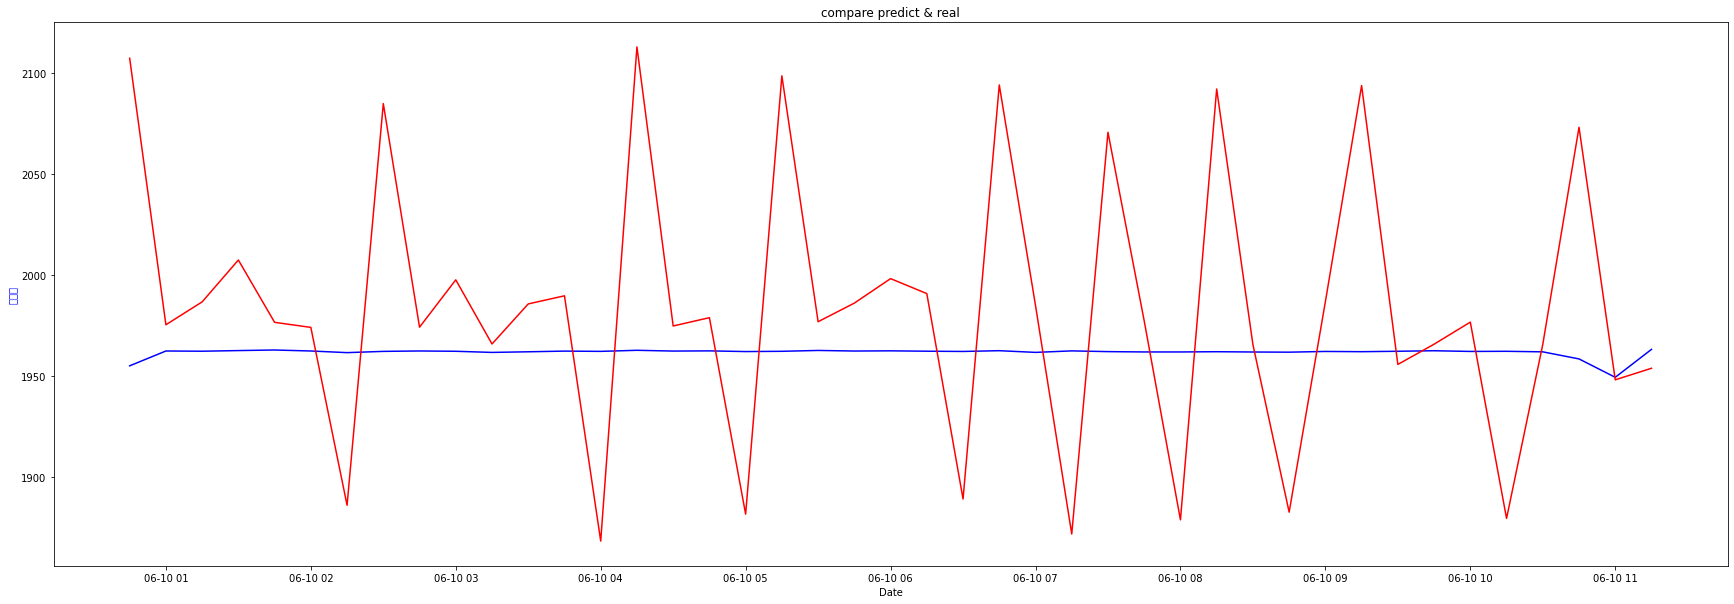

In [10]:
  
#result 시각화
dd=testtest['datetime']
dd=pd.merge(dd,test_df,on=['datetime'],how='left')
dd=dd[['datetime','초지_전력사용량']]
dd=dd.reset_index()
dd['predict']=pd.DataFrame(results_f)
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.plot(dd['datetime'],dd['predict'], 'b')
plt.plot(dd['datetime'],dd['초지_전력사용량'], 'r')
plt.ylabel('사용량', color='blue')
plt.title('compare predict & real')
plt.xlabel('Date')


all options


In [84]:
# Create a tpot object with a few parameters
tpot_all = TPOTRegressor(scoring = 'neg_mean_absolute_error',
                    n_jobs = -1,
                    verbosity = 2,
                    cv = 5) 

In [85]:
# Fit the tpot model on the training data
tpot_all.fit(training_features, training_targets)   # 0708 scoring : neg_mean_absolute_error 

Imputing missing values in feature set


Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -60.10725421736788

Generation 2 - Current best internal CV score: -59.91632661857009

Generation 3 - Current best internal CV score: -59.90045553118006

Generation 4 - Current best internal CV score: -59.06608497126457

Generation 5 - Current best internal CV score: -59.06608497126457

Generation 6 - Current best internal CV score: -59.001572009137064

Generation 7 - Current best internal CV score: -58.47547070162805

Generation 8 - Current best internal CV score: -58.47547070162805

Generation 9 - Current best internal CV score: -58.47547070162805

Generation 10 - Current best internal CV score: -58.47547070162805

Generation 11 - Current best internal CV score: -58.47295415464863

Generation 12 - Current best internal CV score: -58.46292292755326

Generation 13 - Current best internal CV score: -58.46292292755326

Generation 14 - Current best internal CV score: -58.459802951680956

Generation 15 - Current best internal CV score: -58.38

TPOTRegressor(n_jobs=-1, scoring='neg_mean_absolute_error', verbosity=2)

In [87]:
print(tpot_all.score(testing_features, testing_targets))

Imputing missing values in feature set
-51.17235873909885


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


In [88]:
# Export the pipeline as a python script file
tpot_all.export('C:/Users/USER/Desktop/Side/AutoML/tpot_exported_pipeline_regression_hansol_choji_220708_all.py')

pipeline학습


In [102]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFwe, SelectPercentile, f_regression
from sklearn.linear_model import LassoLarsCV, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler
from tpot.builtins import StackingEstimator
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer

# # NOTE: Make sure that the outcome column is labeled 'target' in the data file
# tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
# features = tpot_data.drop('target', axis=1)
# training_features, testing_features, training_target, testing_target = \
#             train_test_split(features, tpot_data['target'], random_state=None)

imputer = SimpleImputer(strategy="median")
imputer.fit(training_features)
training_features = imputer.transform(training_features)
testing_features = imputer.transform(testing_features)

# Average CV score on the training set was: -57.74154519861288
exported_pipeline = make_pipeline(
    SelectPercentile(score_func=f_regression, percentile=49),
    SelectFwe(score_func=f_regression, alpha=0.043000000000000003),
    MinMaxScaler(),
    StackingEstimator(estimator=LassoLarsCV(normalize=True)),
    StackingEstimator(estimator=SGDRegressor(alpha=0.01, eta0=0.01, fit_intercept=True, l1_ratio=1.0, learning_rate="invscaling", loss="squared_loss", penalty="elasticnet", power_t=1.0)),
    XGBRegressor(learning_rate=0.1, max_depth=1, min_child_weight=5, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.6500000000000001, verbosity=0)
)

model=exported_pipeline.fit(training_features, training_targets)
results = exported_pipeline.predict(testing_features)


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


In [108]:
model

Pipeline(steps=[('selectpercentile',
                 SelectPercentile(percentile=49,
                                  score_func=<function f_regression at 0x000002834B8DF820>)),
                ('selectfwe',
                 SelectFwe(alpha=0.043000000000000003,
                           score_func=<function f_regression at 0x000002834B8DF820>)),
                ('minmaxscaler', MinMaxScaler()),
                ('stackingestimator-1',
                 StackingEstimator(estimator=LassoLarsCV(normalize=True))),
                ('stacki...
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.1, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=1, max_leaves=0, min_child_weight=5,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=1, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

#model 회고     
1.Selectpercentile : [Feature Selection] Select features according to a percentile of the highest scores. 일변량 분석(regression p-value값) 기반으로 선택        
2.SelectFwe : [Feature Selection]   Filter: Select the p-values corresponding to Family-wise error rate
3. Minmax scaler 
4. stacking estimator 1 : LassoLarsCV
5 .stacking estimator 2 : SGD Regressor
6. XGBRegressor

In [105]:
# model save to disk
import pickle
filename = 'C:/Users/USER/Desktop/Side/AutoML/TPOT_regressor_model_hansol_choji_220711_all.sav'
pickle.dump(model, open(filename, 'wb'))

In [11]:

# load the model from disk
import pickle
from sklearn.impute import SimpleImputer
filename = 'C:/Users/USER/Desktop/Side/AutoML/TPOT_regressor_model_hansol_choji_220711_all.sav'
loaded_model = pickle.load(open(filename, 'rb'))
#testing_feautrues imputing
imputer = SimpleImputer(strategy="median")
imputer.fit(training_features)
testing_features = imputer.transform(testing_features)

#predict
results_f = loaded_model.predict(testing_features)
def SMAPE(y_true, y_pred):
    return np.mean( (np.abs(y_true-y_pred)) / ((np.abs(y_true) + np.abs(y_pred))/2) ) * 100
SMAPE(testing_targets,results_f)


2.5406001367719218

Text(0.5, 0, 'Date')

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


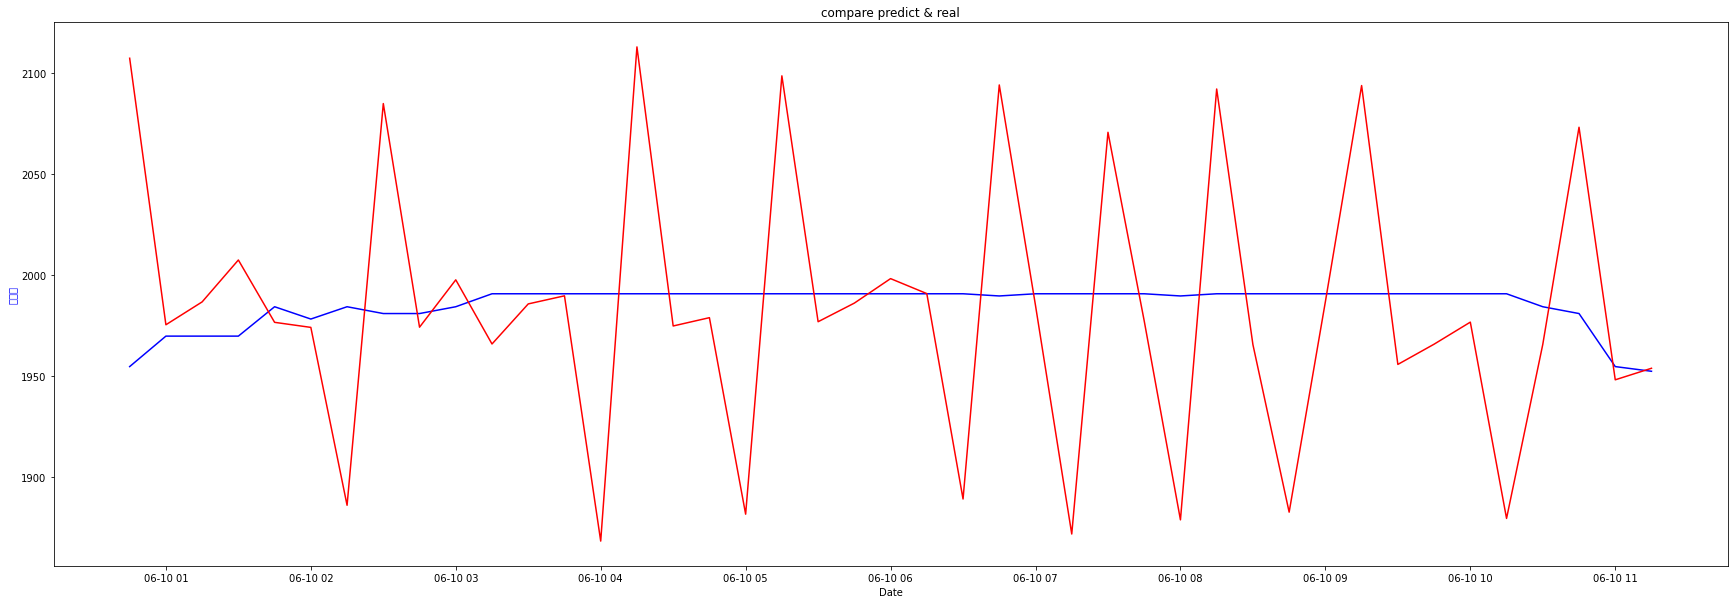

In [12]:
  
#result 시각화
dd=testtest['datetime']
dd=pd.merge(dd,test_df,on=['datetime'],how='left')
dd=dd[['datetime','초지_전력사용량']]
dd=dd.reset_index()
dd['predict']=pd.DataFrame(results_f)
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.plot(dd['datetime'],dd['predict'], 'b')
plt.plot(dd['datetime'],dd['초지_전력사용량'], 'r')
plt.ylabel('사용량', color='blue')
plt.title('compare predict & real')
plt.xlabel('Date')

기능화는 ?       
(1) 사용자가 PC에 저장된 csv파일을 Upload해서      
(2) 문제 유형(분류/회귀)을 선택하고      
(3) Target 을 설정하고,       
(4) tpot으로 자동 생성된 모델들을 비교하고,      
(5) Best Model을 만들 수 있는 코드를 받는다.